## 加载数据和训练模型

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
from keras import layers
data=input_data.read_data_sets('./fashion-mnist/',one_hot=True)
X_train,y_train=data.train.images,data.train.labels
X_test,y_test=data.test.images,data.test.labels
import tensorflow as tf 
X_train=X_train.reshape(len(X_train),28,4,-1)
X_test=X_test.reshape(len(X_test),28,4,-1)



Extracting ./fashion-mnist/train-images-idx3-ubyte.gz
Extracting ./fashion-mnist/train-labels-idx1-ubyte.gz
Extracting ./fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting ./fashion-mnist/t10k-labels-idx1-ubyte.gz
Epoch 1/12
55000/55000 [==============================] - 4s 64us/step - loss: 1.1698 - accuracy: 0.6833
Epoch 2/12
55000/55000 [==============================] - 2s 35us/step - loss: 0.4195 - accuracy: 0.8795
Epoch 3/12
55000/55000 [==============================] - 2s 35us/step - loss: 0.3369 - accuracy: 0.9018
Epoch 4/12
55000/55000 [==============================] - 2s 35us/step - loss: 0.2896 - accuracy: 0.9157
Epoch 5/12
55000/55000 [==============================] - 2s 36us/step - loss: 0.2559 - accuracy: 0.9256
Epoch 6/12
55000/55000 [==============================] - 2s 35us/step - loss: 0.2282 - accuracy: 0.9340
Epoch 7/12
55000/55000 [==============================] - 2s 36us/step - loss: 0.2074 - accuracy: 0.9401
Epoch 8/12
55000/55000 [===========================

In [39]:
from keras.models import Sequential
model=Sequential()
model.add(layers.Conv2D(12,3,strides=1,padding='same',activation='relu'))
model.add(layers.MaxPool2D(3,padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softplus'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=12,batch_size=300)
model.load_weights('WeightsH5.h5',by_name=True)

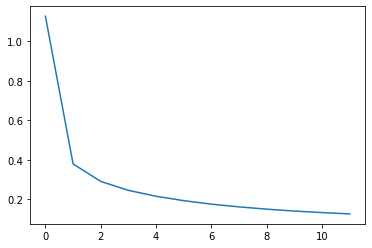

In [25]:
# model.summary()
from matplotlib import pyplot as plt 
plt.plot(history.history['loss'])
plt.show()

## 保存模型和加载模型
> - 模型的结构，以便重构该模型
- 模型的权重
- 训练配置（损失函数，优化器等）
- 优化器的状态，以便于从上次训练中断的地方开始

In [34]:
model.save('ModelH5.h5')

from keras.models import load_model 
c=load_model('ModelH5.h5')
c 

c.predict_classes(X_test)

### 只是希望保存模型的结构，而不包含其权重或配置信息

In [48]:
v=model.to_json()
with open('model.json','w') as f:
    f.write(v)  

In [58]:
from keras.models import model_from_json 
with open('model.json','r') as f:
    r=model_from_json(f.read())
r.name 

'sequential_20'

## 保存权重并加载权重

model.save_weights('WeightsH5.h5')

In [44]:
from keras.models import Sequential
model=Sequential()
model.add(layers.Conv2D(12,3,strides=1,padding='same',activation='relu'))
model.add(layers.MaxPool2D(3,padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softplus'))
model.load_weights('WeightsH5.h5',by_name=True)

In [46]:
model.predict_classes(X_test)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.